Average Double Faults by Player Ranking

In [40]:
import pandas as pd


away_team_score = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\away_team_score.csv')
away_team = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\away_team.csv')
event = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\event.csv')
home_team_score = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\home_team_score.csv')
home_team = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\home_team.csv')
raw_odds_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_odds_parquet.csv')
raw_point_by_point_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_point_by_point_parquet.csv')
raw_statistics_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_statistics_parquet.csv')
raw_tennis_power_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_tennis_power_parquet.csv')
raw_votes_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_votes_parquet.csv')
round = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\round.csv')
season = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\season.csv')
time = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\time.csv')
tournament = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\tournament.csv')
venue = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\venue.csv')

In [41]:
home_team_ranking = home_team[['match_id', 'full_name', 'current_rank']]

away_team_ranking = away_team[['match_id', 'full_name', 'current_rank']]

In [42]:
raw_statistics_parquet.head()

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11998445,ALL,service,aces,12,6,1,positive,event,12,6,NaN,NaN
1,11998445,ALL,service,double_faults,2,7,2,negative,event,2,7,NaN,NaN
2,11998445,ALL,service,first_serve,57/101 (56%),53/90 (59%),2,positive,team,57,53,101.0,90.0
3,11998445,ALL,service,second_serve,42/44 (95%),30/37 (81%),1,positive,team,42,30,44.0,37.0
4,11998445,ALL,service,first_serve_points,42/57 (74%),39/53 (74%),1,positive,team,42,39,57.0,53.0


In [43]:
raw_statistics_parquet = raw_statistics_parquet[['match_id' , 'statistic_name' , 'home_stat' , 'away_stat' ,'period']]

raw_statistics_parquet_double_faults = raw_statistics_parquet[
    (raw_statistics_parquet['statistic_name'] == 'double_faults') 
    & (raw_statistics_parquet['period'] == "ALL")]

raw_statistics_parquet_double_faults

,match_id,statistic_name,home_stat,away_stat,period
1,11998445,double_faults,2,7,ALL
72,11998446,double_faults,2,1,ALL
126,11998447,double_faults,0,5,ALL
179,11998448,double_faults,2,2,ALL
233,11998449,double_faults,2,3,ALL
...,...,...,...,...,...
665321,12213482,double_faults,0,6,ALL
665375,12213483,double_faults,2,4,ALL
665429,12213484,double_faults,2,7,ALL
665483,12213486,double_faults,1,13,ALL


In [44]:
raw_statistics_parquet_double_faults_home = raw_statistics_parquet_double_faults[['match_id' , 'statistic_name' , 'home_stat' , 'period']]
raw_statistics_parquet_double_faults_away = raw_statistics_parquet_double_faults[['match_id' , 'statistic_name' , 'away_stat' , 'period']]

merged_home = pd.merge(home_team_ranking, raw_statistics_parquet_double_faults_home, how='left', on='match_id')
merged_away = pd.merge(away_team_ranking, raw_statistics_parquet_double_faults_away, how='left', on='match_id')

merged_home = merged_home.rename(columns={'home_stat': 'stat'})
merged_away = merged_away.rename(columns={'away_stat': 'stat'})

concat_home_away = pd.concat([merged_home, merged_away], ignore_index=True)

concat_home_away['stat'] = pd.to_numeric(concat_home_away['stat'], errors='coerce')

concat_home_away = concat_home_away.dropna(subset=['stat'])

mean_rank = concat_home_away.groupby('full_name')['current_rank'].mean().reset_index()

concat_home_away = pd.merge(concat_home_away, mean_rank, on='full_name', suffixes=('', '_mean_rank'))

concat_home_away = concat_home_away[['match_id', 'full_name', 'current_rank_mean_rank', 'stat']]

concat_home_away = concat_home_away.groupby(['full_name', 'current_rank_mean_rank'])['stat'].mean().reset_index()

concat_home_away = concat_home_away.sort_values(by='current_rank_mean_rank' , ascending=True)

concat_home_away['current_rank_mean_rank'] = concat_home_away['current_rank_mean_rank'].round().astype(int)


concat_home_away = concat_home_away.head(50)

concat_home_away.head()

,full_name,current_rank_mean_rank,stat
542,"Djokovic, Novak",1,3.000000
2110,"Swiatek, Iga",1,1.411765
1873,"Sabalenka, Aryna",2,5.500000
32,"Alcaraz, Carlos",2,1.500000
2021,"Sinner, Jannik",3,1.437500


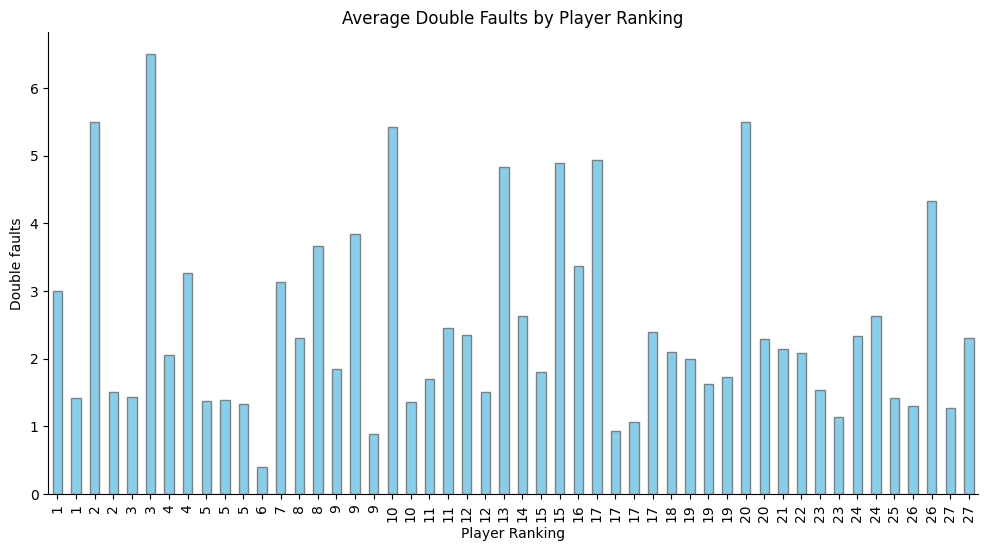

In [45]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(figsize=(12, 6))
concat_home_away.plot(kind='bar', x='current_rank_mean_rank', y='stat', ax=ax, color='skyblue' , edgecolor = 'gray' , legend= False)
ax.set_title('Average Double Faults by Player Ranking')
ax.set_xlabel('Player Ranking') 
ax.set_ylabel('Double faults')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)